# Example Brick Model for process
Example brick model will be 2 AHUs, 60 terminal units.
Half are for perimeter zones vavs with reheat, half are for core zones and are cooling only 

10 core zone terminal units are for mechanical rooms, networking closets, and electrical rooms that must be served 24/7

In [1]:
from rdflib import Namespace, URIRef, RDFS, Graph, Literal
from buildingmotif import BuildingMOTIF
from buildingmotif.dataclasses import Model, Library
from buildingmotif.namespaces import BMOTIF, BRICK, A, RDF
from buildingmotif.model_builder import TemplateBuilderContext
from time import time

In [2]:
BLDG = Namespace("urn:example#")
bm = BuildingMOTIF("sqlite://", "topquadrant")
bldg = Model.create("urn:example#")
bldg.graph.bind('',BLDG)
brick = Library.load(ontology_graph="Brick.ttl")

2025-07-10 17:01:51,819 | root |  WARNING: An ontology could not resolve a dependency on http://qudt.org/2.1/schema/facade/qudt (Name: http://qudt.org/2.1/schema/facade/qudt). Check this is loaded into BuildingMOTIF
2025-07-10 17:01:51,820 | root |  WARNING: An ontology could not resolve a dependency on http://qudt.org/2.1/vocab/prefix (Name: http://qudt.org/2.1/vocab/prefix). Check this is loaded into BuildingMOTIF
2025-07-10 17:01:51,821 | root |  WARNING: An ontology could not resolve a dependency on https://w3id.org/rec/recimports (Name: https://w3id.org/rec/recimports). Check this is loaded into BuildingMOTIF
2025-07-10 17:01:51,821 | root |  WARNING: An ontology could not resolve a dependency on http://qudt.org/2.1/schema/shacl/qudt (Name: http://qudt.org/2.1/schema/shacl/qudt). Check this is loaded into BuildingMOTIF
2025-07-10 17:01:51,822 | root |  WARNING: An ontology could not resolve a dependency on https://w3id.org/rec (Name: https://w3id.org/rec). Check this is loaded int

In [3]:
brick_tmpl = Library.load(directory='brick-templates')

In [4]:
# start with the tank. This instantiates the template with 'my_tank' as the name
# You can assign other parameters here as well. If the value you give to a parameter
# is a string (e.g. 'my_tank') then the builder will automatically make a URL with the BLDG (see cell above) as the namespace
# ahu = ctx['multiple-zone-ahu'](name='ahu1')
# # now create an instance of the water flow property
# flow_prop = ctx['water-flow'](name='tank_outlet_water_flow')
# flow_prop['name-owner'] = my_tank['out']
# # now create the sensor
# flow_sensor = ctx['sensor'](name='my_flow_sensor')
# flow_sensor['where'] = my_tank['out'] # the sensor measures at the outlet of the tank
# flow_sensor['property'] = flow_prop['name'] # associate the sensor's "property" param with the flow property

In [5]:
# bldg_config
# assuming cooling+only and reheat vavs split evenly. Computer spaces are all in the cooling only vavs.
# [ahus, cooling_only_vavs_per_ahu, reheat_vavs_per_ahu]
# Could add amt computer spaces_per_ahu to building if it serves example later

# the context helps us build up our model
ctx = TemplateBuilderContext(BLDG)
ctx.add_templates_from_library(brick)
ctx.add_templates_from_library(brick_tmpl)

In [6]:
# preparing both representations 

In [7]:
# bldg_config = {'ahus': 2, 'cv': 10, 'hv': 10}
# bldg_ctx_dict = {}
# for i in range(bldg_config['ahus']):
#     ahu_name = f'ahu_{i}'
#     # bldg_ctx_dict[name] = ctx['multiple-zone-ahu'](name=name)
#     ahu = ctx['multiple-zone-ahu'](name=ahu_name)
#     for cv in range(bldg_config['cv']):
#         cv_name = f'cvav_{i}_{cv}'
#         cvav = ctx['vav-cooling-only'](name=cv_name)
#         ctx['feeds'](name = ahu['name'], target = cvav['name'])
#     for hv in range(bldg_config['hv']):
#         hv_name = f'hvav_{i}_{hv}'
#         hvav = ctx['vav-with-reheat'](name=hv_name)
#         ctx['feeds'](name = ahu['name'], target = hvav['name'])

In [ ]:
def get_wrapper_dict(ctx):
    wrapper_dict = {}
    for wrapper in ctx.wrappers:
        if wrapper.template.name not in wrapper_dict.keys():
            wrapper_dict[wrapper.template.name] = [wrapper]
        else:
            wrapper_dict[wrapper.template.name].append(wrapper)
    return wrapper_dict

In [9]:
wrapper_dict = get_wrapper_dict(ctx)
template_types = wrapper_dict.keys()
print(template_types)

dict_keys([])


In [10]:
# TEMPLATE_PARAMS_COMPILED = {
#     "vav-cooling-only": {
#         "name": "VAV",
#         "ztemp": "Zone_Air_Temperature_Sensor",
#         "occ": "Occupancy_Sensor",           # optional
#         "co2": "CO2_Level_Sensor",           # optional
#         "dat": "Discharge_Air_Temperature_Sensor",
#         "dmp": "Damper",
#         "dmp-dmppos": "Damper_Position_Command",
#         "zone": "HVAC_Zone"
#     },
#     "vav-with-reheat": {
#         "name": "VAV",
#         "name-ztemp": "Zone_Air_Temperature_Sensor",
#         "name-occ": "Occupancy_Sensor",           # optional
#         "name-co2": "CO2_Level_Sensor",           # optional
#         "name-dat": "Discharge_Air_Temperature_Sensor",
#         "name-dmp": "Damper",
#         "name-dmp-dmppos": "Damper_Position_Command",
#         "name-zone": "HVAC_Zone",
#         "rhc": "Heating_Coil",
#         "rhc-cmd": "Position_Command"
#     },
#     "multiple-zone-ahu": {
#         "name": "AHU",
#         "sa_fan": "Supply_Fan",
#         "sa_fan-start_stop": "Start_Stop_Command",
#         "sa_fan-speed": "Frequency_Command",
#         "sa_fan-status": "Fan_Status",       # optional
#         "ra_damper": "Damper",
#         "ra_damper-dmppos": "Damper_Position_Command",
#         "clg_coil": "Cooling_Coil",
#         "clg_coil-valve_cmd": "Valve_Position_Command",
#         "htg_coil": "Heating_Coil",
#         "htg_coil-valve_cmd": "Valve_Position_Command",
#         "sa_temp": "Supply_Air_Temperature_Sensor",
#         "oa_temp": "Outside_Air_Temperature_Sensor",
#         "ma_temp": "Mixed_Air_Temperature_Sensor",    # optional
#         "ra_temp": "Return_Air_Temperature_Sensor",   # optional
#         "filter_pd": "Filter_Differential_Pressure_Sensor"  # optional
#     },
#     "with-relief-damper": {
#         "name": "AHU",   # composed on the AHU's 'name'
#         "relief-fan": "Exhaust_Fan",
#         "relief-damper": "Damper",
#         "relief-damper-dmppos": "Damper_Position_Command",
#         "relief-damper": "Exhaust_Damper",
#         "sp-sensor": "Static_Pressure_Sensor"   # optional
#     },
#     "with-return-fan": {
#         "name": "AHU",   # composed on the AHU's 'name'
#         "return-fan": "Return_Fan",
#         "relief-damper": "Damper",
#         "relief-damper-dmppos": "Damper_Position_Command",
#         "relief-damper": "Exhaust_Damper",
#         "sp-sensor": "Static_Pressure_Sensor",          # optional
#         "supply-air-flow": "Supply_Air_Flow_Sensor",    # optional
#         "return-air-flow": "Return_Air_Flow_Sensor"     # optional
#     },
#     "relief-fan": {
#         "name": "Exhaust_Fan"
#     },
#     "return-fan": {
#         "name": "Return_Fan"
#     },
#     "fan": {
#         "name": "Fan",
#         "speed": "Frequency_Command",
#         "start_stop": "Start_Stop_Command",
#         "status": "Fan_Status"
#     },
#     "damper": {
#         "name": "Damper",
#         "dmppos": "Damper_Position_Command"
#     },
#     "heating-coil": {
#         "name": "Heating_Coil",
#         "cmd": "Position_Command"
#     },
#     "sa_fan": {
#         "name": "Supply_Fan",
#         "start_stop": "Start_Stop_Command",
#         "speed": "Frequency_Command",
#         "status": "Fan_Status"   # optional
#     },
#     "clg_coil": {
#         "name": "Cooling_Coil",
#         "valve_cmd": "Valve_Position_Command"
#     },
#     "htg_coil": {
#         "name": "Heating_Coil",
#         "valve_cmd": "Valve_Position_Command"
#     },
#     "feeds": {
#         "name": None,    # The subject of the feeds relation (type depends on context)
#         "target": None   # The object of the feeds relation (type depends on context)
#     }
# }

In [11]:
g = Graph()
g.bind('',BLDG)

bldg_config = {'ahus': 4, 'cv': 15, 'hv': 15}
bldg_ctx_dict = {}
for i in range(bldg_config['ahus']):
    template_name = 'multiple-zone-ahu'
    ahu_name = f'ahu_{i}'
    ahu = ctx[template_name](name=ahu_name)
    ahu.bindings = {k: BLDG[f"{template_name}_{k}_{i}"] for k in ahu.parameters}
    # display(ahu.bindings)
    # also adding to condensed representation 
    for k,v in ahu.bindings.items():
        # g.add((BLDG[f"{template_name}-{k.replace('name-','')}"], RDF[f"_{i+1}"], v))
        g.add((BLDG[f"{template_name}-{k.replace('name-','')}"], RDFS[f"member"], v))
    for cv in range(bldg_config['cv']):
        template_name = 'vav-cooling-only'
        cv_name = f'cvav_{i}_{cv}'
        cvav = ctx[template_name](name=cv_name)
        cvav.bindings = {k: BLDG[f"{template_name}_{k}_{i}_{cv}"] for k in cvav.parameters}
        ctx['feeds'](name = ahu['name'], target = cvav['name'])
        for k,v in cvav.bindings.items():
            # g.add((BLDG[f"{template_name}-{k.replace('name-','')}"], RDF[f"_{cv+1}"], v))
            g.add((BLDG[f"{template_name}-{k.replace('name-','')}"], RDFS[f"member"], v))
        # print(cvav.bindings)
    for hv in range(bldg_config['hv']):
        template_name = 'vav-with-reheat'
        hv_name = f'hvav_{i}_{hv}'
        hvav = ctx[template_name](name=hv_name)
        hvav.bindings = {k: BLDG[f"{template_name}_{k}_{i}_{hv}"] for k in hvav.parameters}
        ctx['feeds'](name = ahu['name'], target = hvav['name'])
        for k,v in hvav.bindings.items():
            # g.add((BLDG[f"{template_name}-{k.replace('name-','')}"], RDF[f"_{hv+1}"], v))
            g.add((BLDG[f"{template_name}-{k.replace('name-','')}"], RDFS[f"member"], v))

wrapper_dict = get_wrapper_dict(ctx)
template_types = wrapper_dict.keys()

skip_templates = ['feeds']
for tp in template_types:
    if tp in skip_templates:
        continue
    for wrapper in wrapper_dict[tp]:
        params = wrapper.parameters
        eval_dict = {}
        for param in params:
            # if param not in TEMPLATE_PARAMS_COMPILED[tp].keys():
            #     print(param)
            # g.add((BLDG[f"{tp}-{param.replace('name-','')}"], A, BRICK[TEMPLATE_PARAMS_COMPILED[tp][param]]))
            name = f"{tp}-{param.replace('name-','')}"
            g.add((BLDG[name], A, RDF.Seq))
            eval_dict[param] = BLDG[name]
        template_graph = wrapper.template.evaluate(eval_dict)
        if not isinstance(template_graph, Graph):
            print('not a graph, cant add')
        g = g + template_graph
    # adding feeds manually 
    g.add((BLDG['multiple-zone-ahu-name'], BRICK.feeds, BLDG['vav-cooling-only-name']))
    g.add((BLDG['multiple-zone-ahu-name'], BRICK.feeds, BLDG['vav-with-reheat-name']))

In [12]:
g.serialize('brick-example-groups.ttl', format = 'ttl')

<Graph identifier=Nc664626891724421876d93e46ab4ba32 (<class 'rdflib.graph.Graph'>)>

In [13]:
g_no_data = g.query("""
            CONSTRUCT {
                   ?s ?p ?o .
                    ?s a ?type .
                    ?o a ?otype .
            }
            WHERE {
            ?s ?p ?o .
            ?s a ?type .
            ?o a ?otype .
            FILTER EXISTS {
                    ?o a rdf:Seq .
                }
            FILTER (?type != rdf:Seq) .
            
            FILTER (?otype != rdf:Seq) .
            }
                   """).graph

def get_label(s):
    name= str(s).rsplit('-')[-1] if str(s).rsplit('-')[-1] != 'name' else str(s).rsplit('-')[-2]
    return Literal(name)
for s,p,o in g_no_data.triples((None,None,None)):    
    if p == A:
        continue               
    if p == BRICK.hasPoint:
        g_no_data.add((o, A, BRICK.Point))
    g_no_data.add((s, RDFS.label, get_label(s)))
    g_no_data.add((o, RDFS.label, get_label(o)))

g_no_data.bind('bldg',BLDG)

In [14]:
g_no_data.serialize("brick-example-groups-no-data.ttl", format = 'ttl')

<Graph identifier=Nac7b68323458471b9144364413f70ac6 (<class 'rdflib.graph.Graph'>)>

In [15]:
bldg.add_graph(ctx.compile())
bldg.graph.serialize('brick-example.ttl', format = 'ttl')

<Graph identifier=4a5deb3b-56a5-415c-bacf-28e5a44dd4f9 (<class 'rdflib.graph.Graph'>)>

# Querying

In [16]:
# example query. What is the discharge air temperature of cooling only VAVs
import sys
import os
# current_dir = os.path.dirname(__file__)
# utils_path = os.path.abspath(os.path.join(current_dir, '..', 'utils'))
sys.path.insert(0, '../utils')
from utils import query_to_df, get_prefixes



In [17]:
st = time()
bldg_query = """
SELECT ?dat 
WHERE {
    ?dat a brick:Discharge_Air_Temperature_Sensor .
    ?vav a brick:VAV .
    ?vav brick:hasPoint ?dat .
    FILTER NOT EXISTS {
        ?vav brick:hasPart ?rc .
        ?rc a brick:Heating_Coil .
    }
}
"""
query_to_df(bldg_query, bldg.graph)
et = time()
elapsed_time = et - st
print(elapsed_time)

14.819653034210205


In [18]:
# to use the alternative representation, just need to query for members of hte container
# things that don't ask for topology - really fast and easy
group_query = """
SELECT ?dat 
WHERE {
    ?datC a brick:Discharge_Air_Temperature_Sensor .
    ?vav a brick:VAV .
    ?vav brick:hasPoint ?datC .
    FILTER NOT EXISTS {
        ?vav brick:hasPart ?rc .
        ?rc a brick:Heating_Coil .
    }
    ?datC rdfs:member ?dat
}
"""
st = time()
query_to_df(group_query, g)
et = time()
elapsed_time = et - st
print(elapsed_time)

0.01220703125


In [19]:
# things that do ask for topology are still faster when using the overlayer than without 
group_bldg_query_wrong = """
SELECT ?dat ?vav ?ahu
WHERE {
    ?dat a brick:Discharge_Air_Temperature_Sensor .
    ?vav a brick:VAV .
    ?vav brick:hasPoint ?dat .
    ?ahu brick:feeds ?vav
    FILTER NOT EXISTS {
        ?vav brick:hasPart ?rc .
        ?rc a brick:Heating_Coil .
    }
}
"""

query_to_df(group_bldg_query_wrong, bldg.graph)

dat  \
0   urn:example#vav-cooling-only_dat_2_12   
1   urn:example#vav-cooling-only_dat_1_12   
2   urn:example#vav-cooling-only_dat_1_14   
3    urn:example#vav-cooling-only_dat_2_3   
4    urn:example#vav-cooling-only_dat_3_5   
5    urn:example#vav-cooling-only_dat_2_5   
6    urn:example#vav-cooling-only_dat_3_1   
7    urn:example#vav-cooling-only_dat_0_2   
8    urn:example#vav-cooling-only_dat_2_6   
9    urn:example#vav-cooling-only_dat_2_7   
10   urn:example#vav-cooling-only_dat_0_3   
11   urn:example#vav-cooling-only_dat_3_3   
12   urn:example#vav-cooling-only_dat_1_0   
13   urn:example#vav-cooling-only_dat_1_5   
14   urn:example#vav-cooling-only_dat_2_4   
15  urn:example#vav-cooling-only_dat_1_10   
16   urn:example#vav-cooling-only_dat_1_6   
17   urn:example#vav-cooling-only_dat_0_1   
18   urn:example#vav-cooling-only_dat_2_9   
19   urn:example#vav-cooling-only_dat_0_8   
20  urn:example#vav-cooling-only_dat_2_10   
21   urn:example#vav-cooling-only_dat_3_8   
22   urn:example#vav-cooling-only_dat_1_2   
23   urn:example#vav-cooling-only_dat_1_3   
24   urn:example#vav-cooling-only_dat_3_2   
25  urn:example#vav-cooling-only_dat_1_11   
26  urn:example#vav-cooling-only_dat_3_11   
27  urn:example#vav-cooling-only_dat_2_14   
28   urn:example#vav-cooling-only_dat_1_4   
29   urn:example#vav-cooling-only_dat_1_1   
30  urn:example#vav-cooling-only_dat_0_13   
31   urn:example#vav-cooling-only_dat_2_2   
32   urn:example#vav-cooling-only_dat_1_9   
33   urn:example#vav-cooling-only_dat_1_8   
34  urn:example#vav-cooling-only_dat_0_11   
35  urn:example#vav-cooling-only_dat_2_13   
36  urn:example#vav-cooling-only_dat_3_13   
37   urn:example#vav-cooling-only_dat_2_1   
38  urn:example#vav-cooling-only_dat_0_14   
39  urn:example#vav-cooling-only_dat_0_12   
40  urn:example#vav-cooling-only_dat_3_12   
41   urn:example#vav-cooling-only_dat_1_7   
42   urn:example#vav-cooling-only_dat_0_5   
43  urn:example#vav-cooling-only_dat_2_11   
44   urn:example#vav-cooling-only_dat_3_4   
45  urn:example#vav-cooling-only_dat_3_14   
46  urn:example#vav-cooling-only_dat_3_10   
47   urn:example#vav-cooling-only_dat_0_7   
48   urn:example#vav-cooling-only_dat_0_0   
49   urn:example#vav-cooling-only_dat_0_4   
50   urn:example#vav-cooling-only_dat_3_7   
51   urn:example#vav-cooling-only_dat_0_6   
52   urn:example#vav-cooling-only_dat_2_0   
53   urn:example#vav-cooling-only_dat_3_9   
54   urn:example#vav-cooling-only_dat_2_8   
55   urn:example#vav-cooling-only_dat_0_9   
56  urn:example#vav-cooling-only_dat_1_13   
57   urn:example#vav-cooling-only_dat_3_0   
58  urn:example#vav-cooling-only_dat_0_10   
59   urn:example#vav-cooling-only_dat_3_6   

                                       vav  \
0   urn:example#vav-cooling-only_name_2_12   
1   urn:example#vav-cooling-only_name_1_12   
2   urn:example#vav-cooling-only_name_1_14   
3    urn:example#vav-cooling-only_name_2_3   
4    urn:example#vav-cooling-only_name_3_5   
5    urn:example#vav-cooling-only_name_2_5   
6    urn:example#vav-cooling-only_name_3_1   
7    urn:example#vav-cooling-only_name_0_2   
8    urn:example#vav-cooling-only_name_2_6   
9    urn:example#vav-cooling-only_name_2_7   
10   urn:example#vav-cooling-only_name_0_3   
11   urn:example#vav-cooling-only_name_3_3   
12   urn:example#vav-cooling-only_name_1_0   
13   urn:example#vav-cooling-only_name_1_5   
14   urn:example#vav-cooling-only_name_2_4   
15  urn:example#vav-cooling-only_name_1_10   
16   urn:example#vav-cooling-only_name_1_6   
17   urn:example#vav-cooling-only_name_0_1   
18   urn:example#vav-cooling-only_name_2_9   
19   urn:example#vav-cooling-only_name_0_8   
20  urn:example#vav-cooling-only_name_2_10   
21   urn:example#vav-cooling-only_name_3_8   
22   urn:example#vav-cooling-only_name_1_2   
23   urn:example#vav-cooling-only_name_1_3   
24   urn:example#vav-cooling-only_name_3_2   
25  urn:example#vav-cooling-only_name_1_11   
26  urn:example#vav-cooling-only_name_3_11   
27  

In [20]:
# Routing queries through alternative representation where topology only used to filter is still faster
group_bldg_query = """
SELECT ?dat ?vav ?ahu
WHERE {
    ?vavC a brick:VAV .
    ?vavC rdfs:member ?vav .
    ?ahu brick:feeds ?vav .
    ?vav brick:hasPoint ?dat .
    ?dat a brick:Discharge_Air_Temperature_Sensor .
    FILTER NOT EXISTS {
        ?vavC brick:hasPart ?rc .
        ?rc a brick:Heating_Coil .
    }
}
"""
query_to_df(group_bldg_query, bldg.graph + g)

dat  \
0    urn:example#vav-cooling-only_dat_1_7   
1   urn:example#vav-cooling-only_dat_1_11   
2   urn:example#vav-cooling-only_dat_3_13   
3    urn:example#vav-cooling-only_dat_1_0   
4    urn:example#vav-cooling-only_dat_1_1   
5   urn:example#vav-cooling-only_dat_2_14   
6    urn:example#vav-cooling-only_dat_3_8   
7   urn:example#vav-cooling-only_dat_0_14   
8    urn:example#vav-cooling-only_dat_2_3   
9    urn:example#vav-cooling-only_dat_3_0   
10   urn:example#vav-cooling-only_dat_3_4   
11   urn:example#vav-cooling-only_dat_0_3   
12  urn:example#vav-cooling-only_dat_3_10   
13   urn:example#vav-cooling-only_dat_2_8   
14   urn:example#vav-cooling-only_dat_1_8   
15   urn:example#vav-cooling-only_dat_3_7   
16   urn:example#vav-cooling-only_dat_0_5   
17   urn:example#vav-cooling-only_dat_0_7   
18  urn:example#vav-cooling-only_dat_2_11   
19  urn:example#vav-cooling-only_dat_3_11   
20   urn:example#vav-cooling-only_dat_3_2   
21   urn:example#vav-cooling-only_dat_3_1   
22   urn:example#vav-cooling-only_dat_1_3   
23   urn:example#vav-cooling-only_dat_1_4   
24   urn:example#vav-cooling-only_dat_0_0   
25   urn:example#vav-cooling-only_dat_1_9   
26  urn:example#vav-cooling-only_dat_0_12   
27   urn:example#vav-cooling-only_dat_0_1   
28   urn:example#vav-cooling-only_dat_1_2   
29   urn:example#vav-cooling-only_dat_3_9   
30  urn:example#vav-cooling-only_dat_1_12   
31   urn:example#vav-cooling-only_dat_2_7   
32   urn:example#vav-cooling-only_dat_2_0   
33  urn:example#vav-cooling-only_dat_3_14   
34   urn:example#vav-cooling-only_dat_1_6   
35   urn:example#vav-cooling-only_dat_3_6   
36   urn:example#vav-cooling-only_dat_2_4   
37   urn:example#vav-cooling-only_dat_2_9   
38   urn:example#vav-cooling-only_dat_2_2   
39  urn:example#vav-cooling-only_dat_1_13   
40   urn:example#vav-cooling-only_dat_0_6   
41  urn:example#vav-cooling-only_dat_2_13   
42   urn:example#vav-cooling-only_dat_0_9   
43   urn:example#vav-cooling-only_dat_0_2   
44   urn:example#vav-cooling-only_dat_0_8   
45   urn:example#vav-cooling-only_dat_2_5   
46  urn:example#vav-cooling-only_dat_0_13   
47   urn:example#vav-cooling-only_dat_2_6   
48  urn:example#vav-cooling-only_dat_0_11   
49  urn:example#vav-cooling-only_dat_0_10   
50   urn:example#vav-cooling-only_dat_1_5   
51  urn:example#vav-cooling-only_dat_2_10   
52  urn:example#vav-cooling-only_dat_1_10   
53   urn:example#vav-cooling-only_dat_3_5   
54  urn:example#vav-cooling-only_dat_2_12   
55   urn:example#vav-cooling-only_dat_3_3   
56  urn:example#vav-cooling-only_dat_3_12   
57   urn:example#vav-cooling-only_dat_0_4   
58  urn:example#vav-cooling-only_dat_1_14   
59   urn:example#vav-cooling-only_dat_2_1   

                                       vav  \
0    urn:example#vav-cooling-only_name_1_7   
1   urn:example#vav-cooling-only_name_1_11   
2   urn:example#vav-cooling-only_name_3_13   
3    urn:example#vav-cooling-only_name_1_0   
4    urn:example#vav-cooling-only_name_1_1   
5   urn:example#vav-cooling-only_name_2_14   
6    urn:example#vav-cooling-only_name_3_8   
7   urn:example#vav-cooling-only_name_0_14   
8    urn:example#vav-cooling-only_name_2_3   
9    urn:example#vav-cooling-only_name_3_0   
10   urn:example#vav-cooling-only_name_3_4   
11   urn:example#vav-cooling-only_name_0_3   
12  urn:example#vav-cooling-only_name_3_10   
13   urn:example#vav-cooling-only_name_2_8   
14   urn:example#vav-cooling-only_name_1_8   
15   urn:example#vav-cooling-only_name_3_7   
16   urn:example#vav-cooling-only_name_0_5   
17   urn:example#vav-cooling-only_name_0_7   
18  urn:example#vav-cooling-only_name_2_11   
19  urn:example#vav-cooling-only_name_3_11   
20   urn:example#vav-cooling-only_name_3_2   
21   urn:example#vav-cooling-only_name_3_1   
22   urn:example#vav-cooling-only_name_1_3   
23   urn:example#vav-cooling-only_name_1_4   
24   urn:example#vav-cooling-only_name_0_0   
25   urn:example#vav-cooling-only_name_1_9   
26  urn:example#vav-cooling-only_name_0_12   
27  

In [21]:
print("Triple Counts")
print(f" - Full Graph: {len(bldg.graph)}")
print(f" - Short Graph with Links to Full Graph: {len(g)}")
print(f" - Short Graph without Links to Full Graph: {len(g_no_data)}")
print(f"Reduction for Human Readability: {(1 - len(g_no_data)/len(bldg.graph)) * 100}%")


Triple Counts
 - Full Graph: 3429
 - Short Graph with Links to Full Graph: 1245
 - Short Graph without Links to Full Graph: 123
Reduction for Human Readability: 96.41294838145232%


### asking Gemini 2.5 Flash to write a query given the file 
<model>
pasted brick-example-groups-no-data.ttl
</model>
Please author a SPARQL query for a brick semantic model that will retreive the discharge air temperature of each vav, and the ahu that feeds each vav.


provided with the model and without the model. 


In [22]:
query = """PREFIX bldg: <urn:example#>
PREFIX brick: <https://brickschema.org/schema/Brick#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>

SELECT ?vav ?vavLabel ?datSensor ?datLabel ?feedingAHU ?ahuLabel
WHERE {
  ?vav a brick:VAV .
  ?vav rdfs:label ?vavLabel .

  ?vav brick:hasPoint ?datSensor .
  ?datSensor a brick:Discharge_Air_Temperature_Sensor .
  ?datSensor rdfs:label ?datLabel .

  ?feedingAHU a brick:AHU .
  ?feedingAHU brick:feeds ?vav .
  ?feedingAHU rdfs:label ?ahuLabel .
}
"""
query_to_df(query, bldg.graph)

vav vavLabel  \
0    urn:example#vav-cooling-only_name_2_12      VAV   
1    urn:example#vav-cooling-only_name_1_12      VAV   
2    urn:example#vav-cooling-only_name_1_14      VAV   
3     urn:example#vav-cooling-only_name_2_3      VAV   
4     urn:example#vav-cooling-only_name_3_5      VAV   
..                                      ...      ...   
115   urn:example#vav-cooling-only_name_3_0      VAV   
116  urn:example#vav-cooling-only_name_0_10      VAV   
117   urn:example#vav-with-reheat_name_0_13      VAV   
118   urn:example#vav-cooling-only_name_3_6      VAV   
119    urn:example#vav-with-reheat_name_3_4      VAV   

                                     datSensor  \
0        urn:example#vav-cooling-only_dat_2_12   
1        urn:example#vav-cooling-only_dat_1_12   
2        urn:example#vav-cooling-only_dat_1_14   
3         urn:example#vav-cooling-only_dat_2_3   
4         urn:example#vav-cooling-only_dat_3_5   
..                                         ...   
115       urn:example#vav-cooling-only_dat_3_0   
116      urn:example#vav-cooling-only_dat_0_10   
117  urn:example#vav-with-reheat_name-dat_0_13   
118       urn:example#vav-cooling-only_dat_3_6   
119   urn:example#vav-with-reheat_name-dat_3_4   

                             datLabel                            feedingAHU  \
0    Discharge_Air_Temperature_Sensor  urn:example#multiple-zone-ahu_name_2   
1    Discharge_Air_Temperature_Sensor  urn:example#multiple-zone-ahu_name_1   
2    Discharge_Air_Temperature_Sensor  urn:example#multiple-zone-ahu_name_1   
3    Discharge_Air_Temperature_Sensor  urn:example#multiple-zone-ahu_name_2   
4    Discharge_Air_Temperature_Sensor  urn:example#multiple-zone-ahu_name_3   
..                                ...                                   ...   
115  Discharge_Air_Temperature_Sensor  urn:example#multiple-zone-ahu_name_3   
116  Discharge_Air_Temperature_Sensor  urn:example#multiple-zone-ahu_name_0   
117  Discharge_Air_Temperature_Sensor  urn:example#multiple-zone-ahu_name_0   
118  Discharge_Air_Temperature_Sensor  urn:example#multiple-zone-ahu_name_3   
119  Discharge_Air_Temperature_Sensor  urn:example#multiple-zone-ahu_name_3   

    ahuLabel  
0        AHU  
1        AHU  
2        AHU  
3        AHU  
4        AHU  
..       ...  
115      AHU  
116      AHU  
117      AHU  
118      AHU  
119      AHU  

[120 rows x 6 columns]

In [23]:
query = """PREFIX brick: <https://brickschema.org/schema/Brick#>
PREFIX bf: <https://brickschema.org/schema/BrickFrame#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>

SELECT ?vav ?vavLabel ?dischargeAirTemperatureSensor ?sensorLabel ?ahu ?ahuLabel
WHERE {
    # Find all VAV instances
    ?vav a brick:VAV .
    OPTIONAL { ?vav rdfs:label ?vavLabel . } # Optional: Get a human-readable label for the VAV

    # Find the Discharge_Air_Temperature_Sensor associated with the VAV
    ?vav bf:hasPoint ?dischargeAirTemperatureSensor .
    ?dischargeAirTemperatureSensor a brick:Discharge_Air_Temperature_Sensor .
    OPTIONAL { ?dischargeAirTemperatureSensor rdfs:label ?sensorLabel . } # Optional: Get a human-readable label for the sensor

    # Find the AHU that feeds the VAV
    ?ahu bf:feeds ?vav .
    ?ahu a brick:AHU .
    OPTIONAL { ?ahu rdfs:label ?ahuLabel . } # Optional: Get a human-readable label for the AHU
}"""
query_to_df(query, bldg.graph)

Empty DataFrame
Columns: [vav, vavLabel, dischargeAirTemperatureSensor, sensorLabel, ahu, ahuLabel]
Index: []

Other queries:
Please author a SPARQL query for a brick semantic model that will retreive all the components of every ahu.

with context: 
(correct)
PREFIX bldg: <urn:example#>
PREFIX brick: <https://brickschema.org/schema/Brick#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>

SELECT ?ahu ?ahuLabel ?component ?componentLabel
WHERE {
  ?ahu a brick:AHU .
  ?ahu rdfs:label ?ahuLabel .
  ?ahu brick:hasPart ?component .
  ?component rdfs:label ?componentLabel .
}

without context: 
(doesn't return)
SELECT ?ahu ?ahuLabel ?component ?componentLabel ?componentType
WHERE {
    # Find all AHU instances
    ?ahu a brick:AHU .
    OPTIONAL { ?ahu rdfs:label ?ahuLabel . } # Optional: Get a human-readable label for the AHU

    # Find components that are part of the AHU
    ?ahu bf:hasPart ?component .

    # Get the type of the component (e.g., Fan, Coil, Filter)
    ?component a ?componentType .

    # Optional: Get a human-readable label for the component
    OPTIONAL { ?component rdfs:label ?componentLabel . }

    # Filter out generic Brick classes if desired, focusing on specific component types
    # This optional filter helps to ensure ?componentType is a specific component class
    FILTER(!STRSTARTS(STR(?componentType), STR(brick:)))
}
ORDER BY ?ahuLabel ?componentLabel


Please author a SPARQL query for a brick semantic model that will return all the cooling only vavs.

With context: 
(correct)
PREFIX brick: <https://brickschema.org/schema/Brick#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>

SELECT ?vav ?vavLabel
WHERE {
  ?vav a brick:VAV .
  ?vav rdfs:label ?vavLabel .
  FILTER NOT EXISTS {
    ?vav brick:hasPart ?part .
    ?part a brick:Heating_Coil .
  }
}

without context: 
(doesn't return)
SELECT ?vav ?vavLabel
WHERE {
    # Find all VAV instances
    ?vav a brick:VAV .

    # Ensure the VAV has the 'Cooling' tag
    ?vav bf:hasTag brick:Cooling .

    # Optional: Get a human-readable label for the VAV
    OPTIONAL { ?vav rdfs:label ?vavLabel . }
}

In [24]:
# Going to try with another query 
query = '''
PREFIX brick: <https://brickschema.org/schema/Brick#>
PREFIX bf: <https://brickschema.org/schema/BrickFrame#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>

SELECT ?ahu ?ahuLabel ?component ?componentLabel ?componentType
WHERE {
    # Find all AHU instances
    ?ahu a brick:AHU .
    OPTIONAL { ?ahu rdfs:label ?ahuLabel . } # Optional: Get a human-readable label for the AHU

    # Find components that are part of the AHU
    ?ahu bf:hasPart ?component .

    # Get the type of the component (e.g., Fan, Coil, Filter)
    ?component a ?componentType .

    # Optional: Get a human-readable label for the component
    OPTIONAL { ?component rdfs:label ?componentLabel . }

    # Filter out generic Brick classes if desired, focusing on specific component types
    # This optional filter helps to ensure ?componentType is a specific component class
    FILTER(!STRSTARTS(STR(?componentType), STR(brick:)))
}
ORDER BY ?ahuLabel ?componentLabel
'''
query_to_df(query, bldg.graph)

Empty DataFrame
Columns: [ahu, ahuLabel, component, componentLabel, componentType]
Index: []

In [25]:
# try it with the baseline of providing every class and relation in the model? 

Turning my results into a table 

In [26]:
query = """
SELECT DISTINCT * 
WHERE {
?s a rdf:Seq ;
    rdfs:member ?s_i ;
    ?p ?o .
?o a rdf:Seq ;
    rdfs:member ?o_i .
?s_i ?p ?o_i 
}"""
df = query_to_df(query, bldg.graph + g)

In [27]:
df[['s','o']].drop_duplicates()

s  \
0            urn:example#vav-with-reheat-name   
60            urn:example#vav-with-reheat-dmp   
120        urn:example#multiple-zone-ahu-name   
124         urn:example#vav-cooling-only-name   
184         urn:example#vav-cooling-only-name   
244        urn:example#multiple-zone-ahu-name   
304      urn:example#multiple-zone-ahu-sa_fan   
308          urn:example#vav-with-reheat-name   
368        urn:example#multiple-zone-ahu-name   
372           urn:example#vav-with-reheat-rhc   
432    urn:example#multiple-zone-ahu-clg_coil   
436         urn:example#vav-cooling-only-name   
496        urn:example#multiple-zone-ahu-name   
500   urn:example#multiple-zone-ahu-ra_damper   
504          urn:example#vav-with-reheat-name   
564      urn:example#multiple-zone-ahu-sa_fan   
568    urn:example#multiple-zone-ahu-htg_coil   
572          urn:example#vav-with-reheat-name   
632        urn:example#multiple-zone-ahu-name   
636          urn:example#vav-with-reheat-name   
696        urn:example#multiple-zone-ahu-name   
700          urn:example#vav-with-reheat-name   
760          urn:example#vav-with-reheat-name   
820        urn:example#multiple-zone-ahu-name   
824          urn:example#vav-cooling-only-dmp   
884         urn:example#vav-cooling-only-name   
944      urn:example#multiple-zone-ahu-sa_fan   
948         urn:example#vav-cooling-only-name   
1008       urn:example#multiple-zone-ahu-name   
1012       urn:example#multiple-zone-ahu-name   
1072       urn:example#multiple-zone-ahu-name   
1076        urn:example#vav-cooling-only-name   
1136       urn:example#multiple-zone-ahu-name   

                                                     o  
0                    urn:example#vav-with-reheat-ztemp  
60              urn:example#vav-with-reheat-dmp-dmppos  
120              urn:example#multiple-zone-ahu-sa_temp  
124                   urn:example#vav-cooling-only-co2  
184                  urn:example#vav-cooling-only-zone  
244                  urn:example#vav-cooling-only-name  
304    urn:example#multiple-zone-ahu-sa_fan-start_stop  
308                   urn:example#vav-with-reheat-zone  
368              urn:example#multiple-zone-ahu-ma_temp  
372                urn:example#vav-with-reheat-rhc-cmd  
432   urn:example#multiple-zone-ahu-clg_coil-valve_cmd  
436                 urn:example#vav-cooling-only-ztemp  
496             urn:example#multiple-zone-ahu-htg_coil  
500     urn:example#multiple-zone-ahu-ra_damper-dmppos  
504                    urn:example#vav-with-reheat-co2  
564         urn:example#multiple-zone-ahu-sa_fan-speed  
568   urn:example#multiple-zone-ahu-htg_coil-valve_cmd  
572                    urn:example#vav-with-reheat-occ  
632               urn:example#multiple-zone-ahu-sa_fan  
636                    urn:example#vav-with-reheat-dmp  
696              urn:example#multiple-zone-ahu-ra_temp  
700                    urn:example#vav-with-reheat-dat  
760                    urn:example#vav-with-reheat-rhc  
820            urn:example#multiple-zone-ahu-ra_damper  
824            urn:example#vav-cooling-only-dmp-dmppos  
884                   urn:example#vav-cooling-only-occ  
944        urn:example#multiple-zone-ahu-sa_fan-status  
948                   urn:example#vav-cooling-only-dmp  
1008            urn:example#multiple-zone-ahu-clg_coil  
1012                  urn:example#vav-with-reheat-name  
1072           urn:example#multiple-zone-ahu-filter_pd  
1076                  urn:example#vav-cooling-only-dat  
1136             urn:example#multiple-zone-ahu-oa_temp

In [28]:
# if you bounce back and forth 4 times, the sets when bouncing from one to the other and back should be the same. 
# column for each of the summarized entities. cut repeating columns with same amount of unique values. 
# pivot by subject, then parse table apart. 

In [29]:
print(get_prefixes(g))

PREFIX brick: <https://brickschema.org/schema/Brick#>
PREFIX csvw: <http://www.w3.org/ns/csvw#>
PREFIX dc: <http://purl.org/dc/elements/1.1/>
PREFIX dcat: <http://www.w3.org/ns/dcat#>
PREFIX dcmitype: <http://purl.org/dc/dcmitype/>
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX dcam: <http://purl.org/dc/dcam/>
PREFIX doap: <http://usefulinc.com/ns/doap#>
PREFIX foaf: <http://xmlns.com/foaf/0.1/>
PREFIX geo: <http://www.opengis.net/ont/geosparql#>
PREFIX odrl: <http://www.w3.org/ns/odrl/2/>
PREFIX org: <http://www.w3.org/ns/org#>
PREFIX prof: <http://www.w3.org/ns/dx/prof/>
PREFIX prov: <http://www.w3.org/ns/prov#>
PREFIX qb: <http://purl.org/linked-data/cube#>
PREFIX schema: <https://schema.org/>
PREFIX sh: <http://www.w3.org/ns/shacl#>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>
PREFIX sosa: <http://www.w3.org/ns/sosa/>
PREFIX ssn: <http://www.w3.org/ns/ssn/>
PREFIX time: <http://www.w3.org/2006/time#>
PREFIX vann: <http://purl.org/vocab/vann/>
PREFIX void: <http://rdfs.or

In [36]:
model_length = [858,1715,2572,3429,4286,5143,6000,6857,7714,8571,9428,10285,11142,11999]
not_condensed_t=[1.0104339122772217,3.659578800201416,8.140235185623169,14.326953887939453,22.19902276992798,31.848632097244263,43.38001298904419,56.46975588798523,71.39528107643127,87.86023688316345,107.8054530620575,127.21580195426941,149.26751899719238,172.5640687942505]
condensed_t = [0.03241586685180664,0.09732508659362793,0.12677979469299316,0.24482011795043945,0.35463404655456543,0.48546791076660156,0.6251580715179443,0.8052988052368164,0.9991669654846191,1.2223341464996338,1.4664838314056396,1.7548770904541016,2.0539767742156982,2.298459768295288]

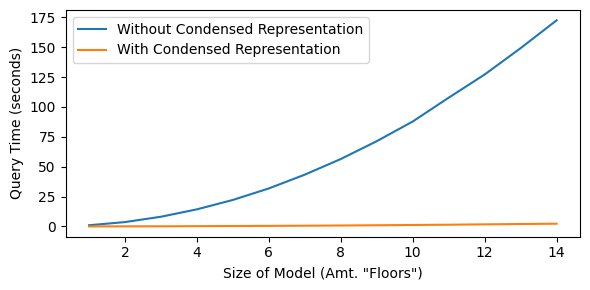

In [42]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,3))
plt.ylabel('Query Time (seconds)')
plt.plot(range(1,15),not_condensed_t, label='Without Condensed Representation')
plt.plot(range(1,15),condensed_t, label='With Condensed Representation')
plt.xlabel('Size of Model (Amt. "Floors")')
# plt.xticks(model_length, [f'{1+i} [{x}]' for i,x in enumerate(model_length)])
plt.legend()
plt.tight_layout()
plt.savefig('query-time.png')